In [2]:
import sqlite3

# Create DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales(
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sales_data = [
    ("Shampoo", 10, 150),
    ("Conditioner", 5, 200),
    ("Hair Oil", 8, 120),
    ("Face Wash", 12, 180)
]

cursor.executemany("INSERT INTO sales VALUES (?,?,?)", sales_data)

conn.commit()
conn.close()


In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print(df)


       product  total_qty  revenue
0  Conditioner         10   2000.0
1    Face Wash         24   4320.0
2     Hair Oil         16   1920.0
3      Shampoo         20   3000.0


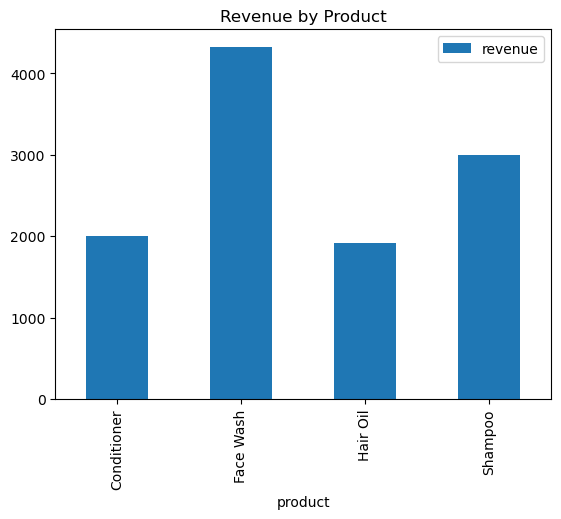

In [4]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.savefig("sales_chart.png")
plt.show()